# OTSU法图像二值化

In [1]:
#coding:utf-8
import numpy
import numpy as np
from numpy.lib.function_base import histogram

# import numpy.histogram
%matplotlib  inline
import cv2
import matplotlib.pyplot as plt
import pandas as pd
from pandas import DataFrame


In [2]:
src = cv2.cvtColor(cv2.imread('../datas/f2.jpg'),cv2.COLOR_BGR2RGB)
gray = cv2.cvtColor(src,cv2.COLOR_RGB2GRAY)

In [3]:
def ostu_thresh(src):
    dst = np.zeros_like(src)
    rows,cols = src.shape[0],src.shape[1]
    counts,bins = histogram(src.flatten(),256,normed=True)
    w = counts.cumsum()
    ut = counts * np.reshape( np.arange(0,256),(1,256))
    u = ut.cumsum()
    max_val = 0
    level = 0
    
    for t in range(256):
        u0 = u[t] / (w[t] + 1.0e-5)
        u1 = (u[255] - u[t]) / ((w[255] - w[t]) + 1.0e-5)
        w0 = w[t]
        w1 = w[255] - w0
        g = w0 * w1 * (u1 - u0) * (u1 - u0)
        if g > max_val:
            max_val = g
            level = t
            
    dst[src < level] = 0
    dst[src >= level] = 255
    
    return dst,level

In [4]:
dst,level = ostu_thresh(gray)
print('level:',level)

level: 97


Text(0.5,1,'OSTU Threshold')

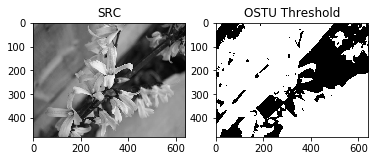

In [5]:
plt.subplot(121)
plt.imshow(gray,'gray')
plt.title('SRC')
plt.subplot(122)
plt.imshow(dst,'gray')
plt.title('OSTU Threshold')

Text(0.5,1,'OpenCV Threshold')

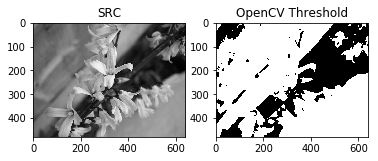

In [6]:
ret,thresh1 = cv2.threshold(gray,97,255,cv2.THRESH_BINARY)  
plt.subplot(121)
plt.imshow(gray,'gray')
plt.title('SRC')
plt.subplot(122)
plt.imshow(dst,'gray')
plt.title('OpenCV Threshold')

In [16]:
def otsu(f):
    n = np.prod(f.shape)
    h = 1.*np.bincount(f.ravel()) / n  # used bincount instead of iahistogram
    if len(h) == 1: return 1,1
    x = np.arange(np.prod(f.shape))
    w0 = np.cumsum(h)
    w1 = 1 - w0
    eps = 1e-10
    m0 = np.cumsum(x * h) / (w0 + eps)
    mt = m0[-1]
    m1 = (mt - m0[0:-1]*w0[0:-1]) / w1[0:-1]
    sB2 = w0[0:-1] * w1[0:-1] * ((m0[0:-1] - m1)**2)
    t = np.argmax(sB2)
    v = sB2[t]
    st2 = np.sum((x-mt)**2 * h)
    eta = v / st2
    return t, eta


参考：

[1]. https://blog.csdn.net/trent1985/article/details/45169015

[2]. https://blog.csdn.net/liyuanbhu/article/details/49387483

[3]. https://blog.csdn.net/qq_20823641/article/details/51480651

[4]. https://blog.csdn.net/taoyanbian1022/article/details/9030825